In [171]:
import requests
from IPython.display import GeoJSON
import pandas as pd
import io
import seaborn as sns
import numpy as np


In [2]:
sensor_params = dict(
    sensor_type='PM2.5')

r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/csv/',sensor_params)

sensor_info = pd.read_csv(io.StringIO(r.text) )
sensor_info

,Sensor Name,Location (WKT),Ground Height Above Sea Level,Sensor Height Above Ground,Broker Name,Third Party,Sensor Centroid Longitude,Sensor Centroid Latitude,Raw ID
0,PER_AIRMON_MESH1756150,POINT (-1.617166 54.974211),47.369999,2.0,aq_mesh_api,False,-1.617166,54.974211,73085
1,PER_AIRMON_MESH1917150,POINT (-1.558721 54.996494),39.040001,2.0,aq_mesh_api,False,-1.558721,54.996494,79160
2,PER_AIRMON_MONITOR1157100,POINT (-1.623043 54.970093),45.270000,2.0,aq_mesh_api,False,-1.623043,54.970093,79565
3,PER_AIRMON_MESH303245,POINT (-1.710484 54.991435),111.110001,2.0,aq_mesh_api,False,-1.710484,54.991435,79515
4,PER_AIRMON_MESH1907150,POINT (-1.603448 54.965679),31.170000,2.0,aq_mesh_api,False,-1.603448,54.965679,79150
...,...,...,...,...,...,...,...,...,...
67,PER_AIRMON_MESH1921150,POINT (-1.60345 54.965674),31.170000,2.0,aq_mesh_api,False,-1.603450,54.965674,79164
68,PER_AIRMON_MESH1691,POINT (-1.626982 54.973636),72.419998,2.0,aq_mesh_api,False,-1.626982,54.973636,1724
69,PER_AIRMON_MESH1968150,POINT (-1.614848 54.97149),42.040001,2.0,aq_mesh_api,False,-1.614848,54.971490,79204
70,PER_AIRMON_MESH1922150,POINT (-1.609327 54.991308),56.869999,2.0,aq_mesh_api,False,-1.609327,54.991308,79165


Lowered zoom level to keep map size reasonable. (z = 10)


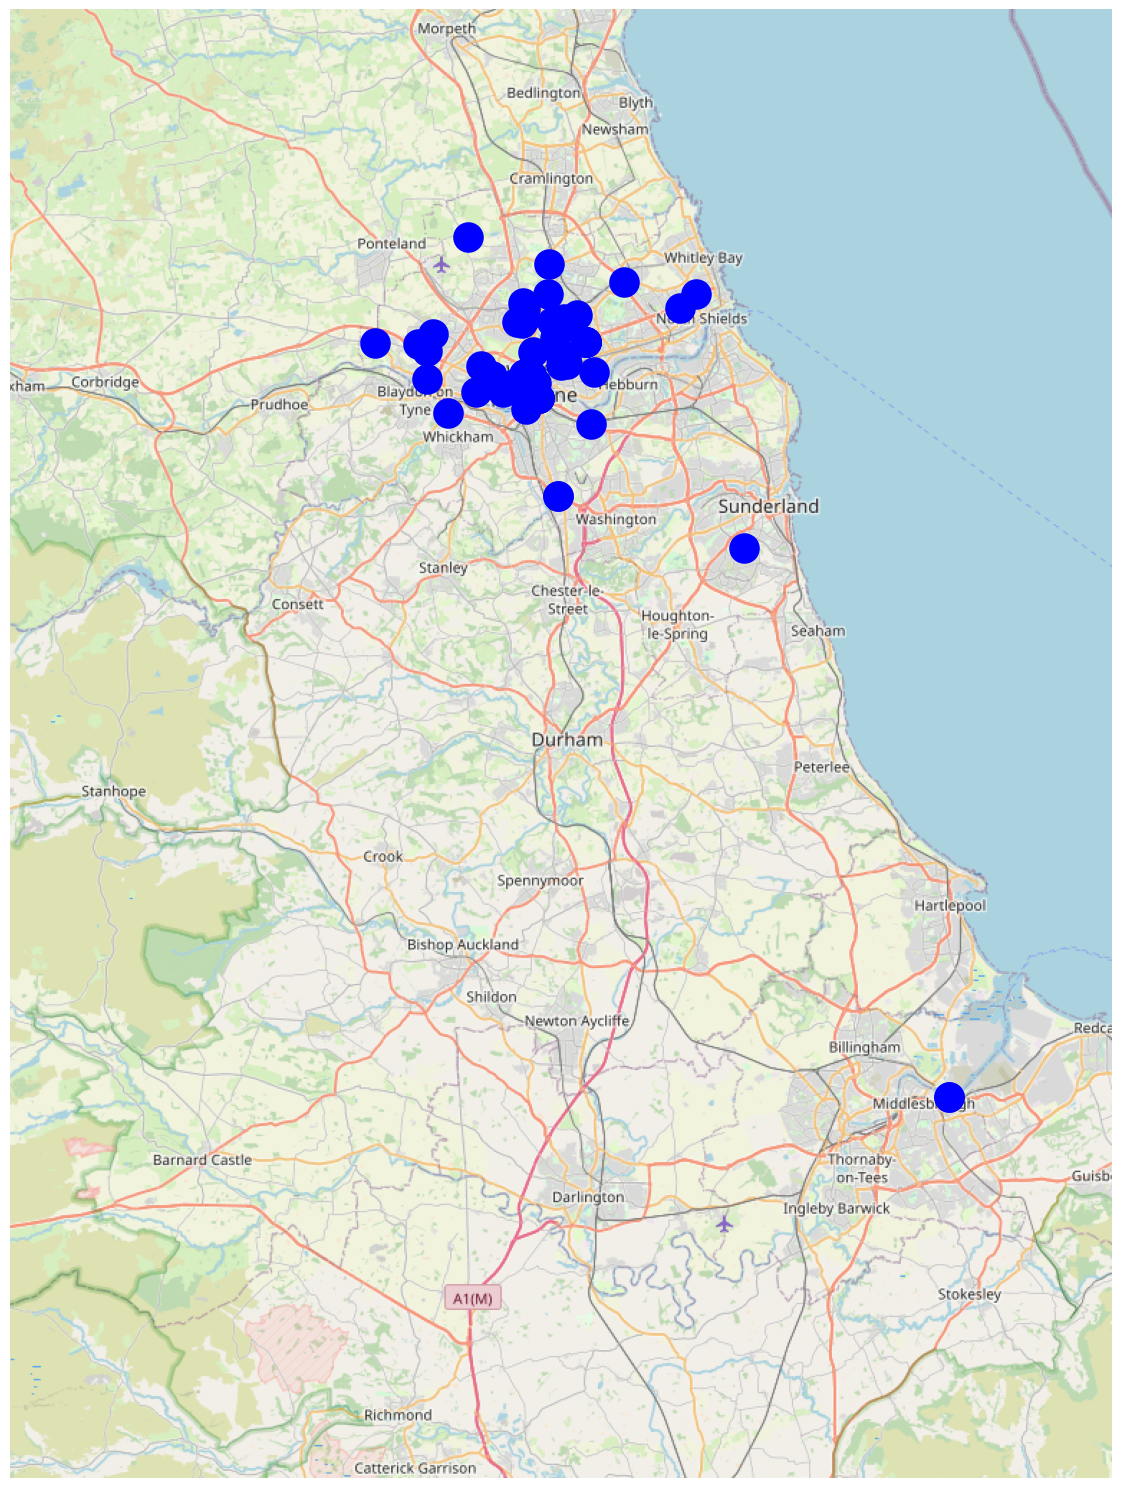

In [4]:
import smopy
import matplotlib.patheffects as pe

bbox = (
min(sensor_info['Sensor Centroid Latitude']),
    min(sensor_info['Sensor Centroid Longitude']),
    max(sensor_info['Sensor Centroid Latitude']),
    max(sensor_info['Sensor Centroid Longitude']),
)

map = smopy.Map(bbox, z=17)
ax = map.show_mpl(figsize=(15, 15))
for i,row in sensor_info.iterrows():
    x, y = map.to_pixels(row['Sensor Centroid Latitude'], row['Sensor Centroid Longitude'])
    ax.plot(x, y, 'ob', ms=20, mew=2);

In [112]:
from datetime import datetime, timedelta

api_date_string_format = "%Y%m%d%H%M%S"

current_time = datetime.now()

start_time = current_time - timedelta(days=1)

start_time = datetime(start_time.year, start_time.month, start_time.day, start_time.hour)
end_time = datetime(current_time.year, current_time.month, current_time.day, current_time.hour)



data_params = dict(
    data_variable='PM2.5',
    agg_method='median',
    agg_period='15mins',
    starttime=start_time.strftime(api_date_string_format),
    endtime=end_time.strftime(api_date_string_format) 
)

data_params.update(sensor_params)
data_params

{'data_variable': 'PM2.5',
 'agg_method': 'median',
 'agg_period': '15mins',
 'starttime': '20230306160000',
 'endtime': '20230307160000',
 'sensor_type': 'PM2.5'}

In [149]:
r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/data/agg/csv/', data_params)
print(r.request.url)
df = pd.read_csv(io.StringIO(r.text))
print(data.head(10))
output = io.StringIO(r.text)
output.readlines()
df.head()



https://newcastle.urbanobservatory.ac.uk/api/v1.1/sensors/data/agg/csv/?data_variable=PM2.5&agg_method=median&agg_period=15mins&starttime=20230306160000&endtime=20230307160000&sensor_type=PM2.5
              Sensor Name Variable   Units            Timestamp   Value  \
0  PER_AIRMON_MESH1970150    PM2.5  ugm -3  2023-03-06 16:00:00  1.5510   
1  PER_AIRMON_MESH1921150    PM2.5  ugm -3  2023-03-06 16:00:00  0.3800   
2  PER_AIRMON_MESH1919150    PM2.5  ugm -3  2023-03-06 16:00:00  0.0000   
3  PER_AIRMON_MESH1916150    PM2.5  ugm -3  2023-03-06 16:00:00  1.2950   
4  PER_AIRMON_MESH1973150    PM2.5  ugm -3  2023-03-06 16:00:00  0.5400   
5  PER_AIRMON_MESH1915150    PM2.5  ugm -3  2023-03-06 16:00:00  0.0100   
6  PER_AIRMON_MESH1969150    PM2.5  ugm -3  2023-03-06 16:00:00  0.2500   
7  PER_AIRMON_MESH1972150    PM2.5  ugm -3  2023-03-06 16:00:00  0.8000   
8  PER_AIRMON_MESH1914150    PM2.5  ugm -3  2023-03-06 16:00:00  6.1985   
9  PER_AIRMON_MESH1961150    PM2.5  ugm -3  2023-03-06 1

,Sensor Name,Variable,Units,Timestamp,Value,Flagged as Suspect Reading,Aggregated Method,Number of records,Location (WKT),Ground Height Above Sea Level,Sensor Height Above Ground,Broker Name,Third Party,Sensor Centroid Longitude,Sensor Centroid Latitude,Raw ID
0,PER_AIRMON_MESH1921150,PM2.5,ugm -3,2023-03-06 16:00:00,0.3800,False,Median,14,POINT (-1.60345 54.965674),31.170000,2.0,aq_mesh_api,False,-1.603450,54.965674,79164
1,PER_AIRMON_MESH1917150,PM2.5,ugm -3,2023-03-06 16:00:00,0.4400,False,Median,14,POINT (-1.558721 54.996494),39.040001,2.0,aq_mesh_api,False,-1.558721,54.996494,79160
2,PER_AIRMON_MESH1909150,PM2.5,ugm -3,2023-03-06 16:00:00,1.8270,False,Median,14,POINT (-1.603448 54.965685),31.170000,2.0,aq_mesh_api,False,-1.603448,54.965685,79152
3,PER_AIRMON_MESH1957150,PM2.5,ugm -3,2023-03-06 16:00:00,1.2295,False,Median,14,POINT (-1.558716 54.996502),39.040001,2.0,aq_mesh_api,False,-1.558716,54.996502,79194
4,PER_AIRMON_MESH1913150,PM2.5,ugm -3,2023-03-06 16:00:00,0.2400,False,Median,14,POINT (-1.704298 55.000748),115.570000,2.0,aq_mesh_api,False,-1.704298,55.000748,79156


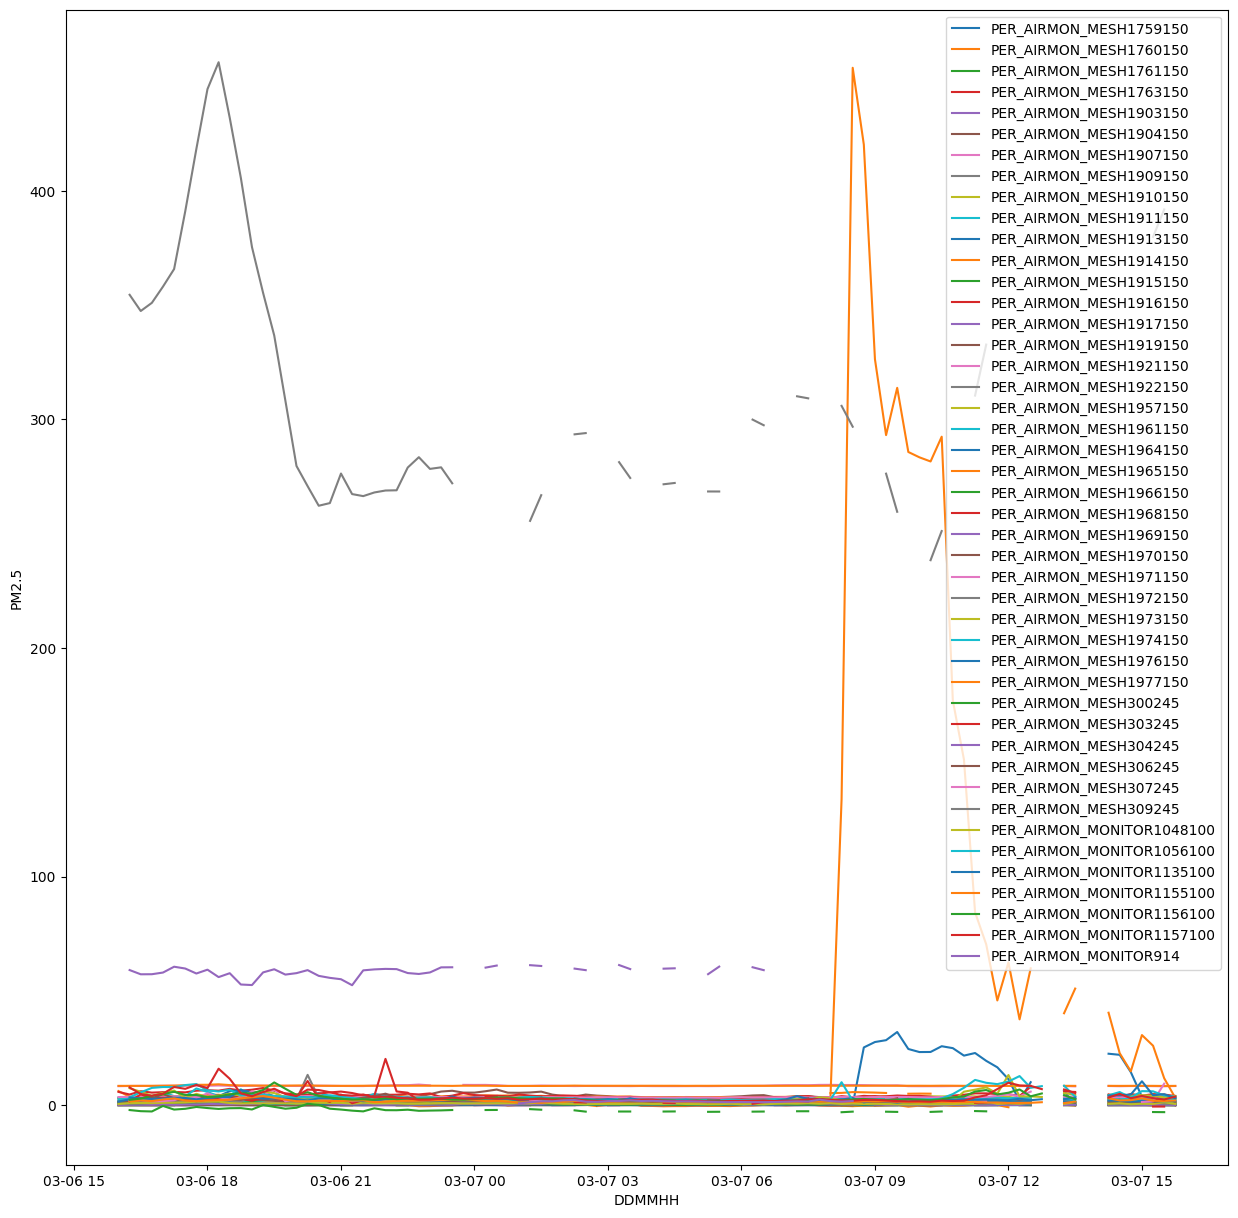

In [172]:
fig, ax = plt.subplots(figsize=(15,15))
for sensor_name,sensor_data in  df.groupby('Sensor Name'):
    datetimes = pd.to_datetime(sensor_data['Timestamp'])
    plt.plot(datetimes,sensor_data['Value'],label=sensor_name)
    plt.xlabel("DDMMHH")
    plt.ylabel(data_params["data_variable"])
    
    
plt.legend()

In [189]:

# Computing IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['Value']>=upper)
print("Upper Bound:",upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['Value']<=lower)
print("Lower Bound:",lower)
print(lower_array)

# Removing the outliers
df.drop(upper_array[0],inplace=True)
df.drop(lower_array[0],inplace=True)

Upper Bound: 7.545
[False False False ... False False False]
Lower Bound: -3.6630000000000003
[False False False ... False False False]


KeyError: '[False] not found in axis'

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4136   NaN
4137   NaN
4138   NaN
4139   NaN
4140   NaN
Name: Value, Length: 4141, dtype: float64


AttributeError: 'numpy.float64' object has no attribute 'groupby'

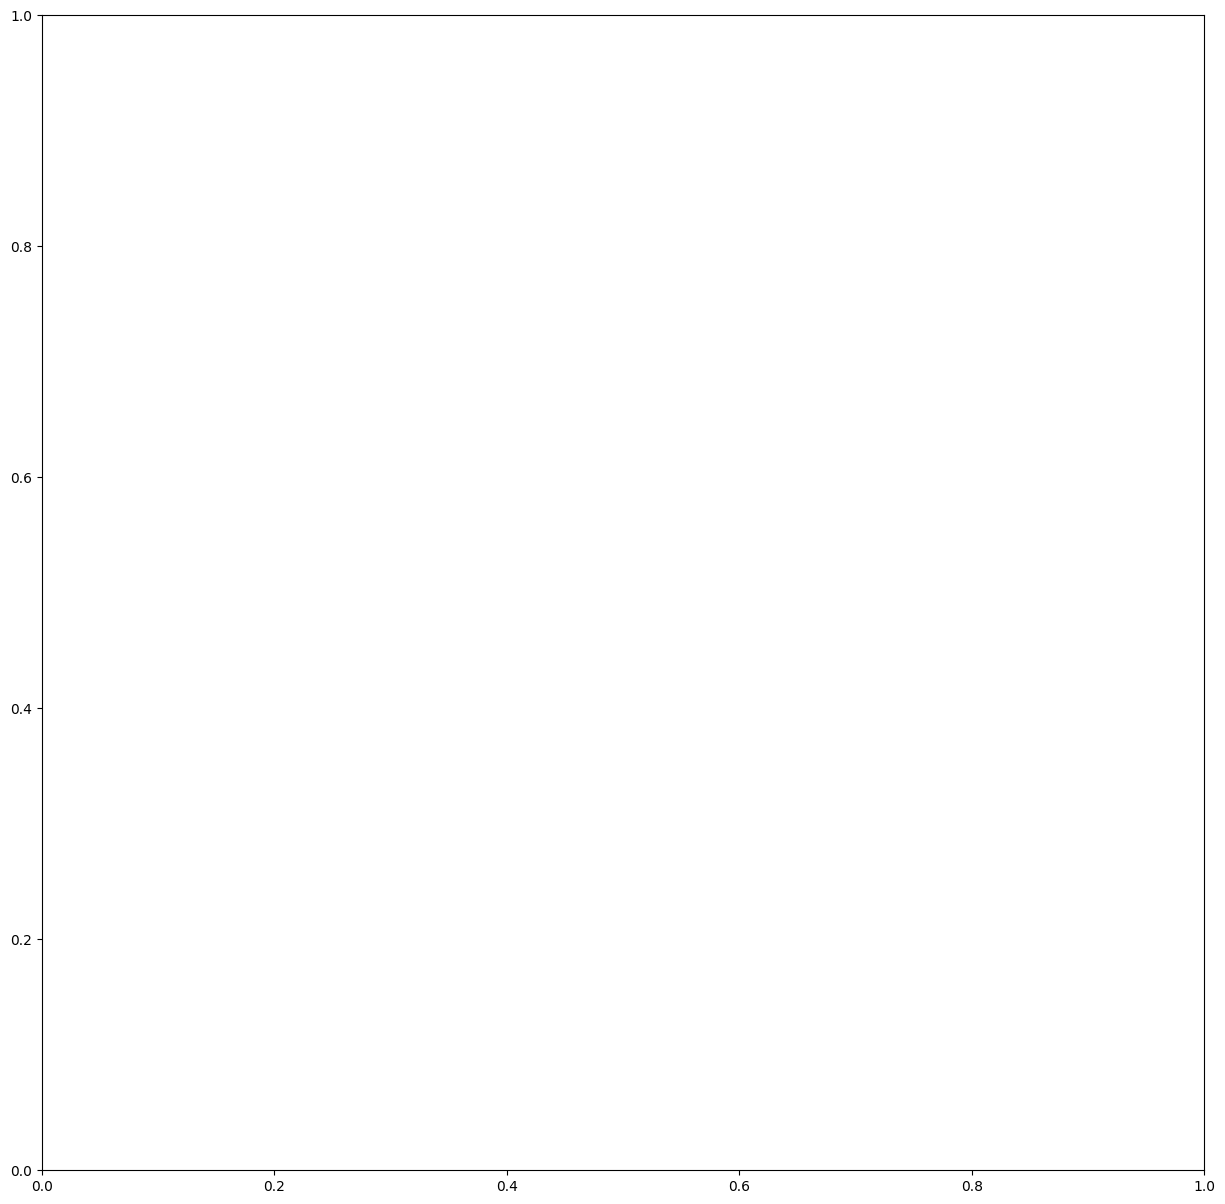

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats


#print(np.where(df['Value']>200))

z = np.abs(stats.zscore(df['Value']))
print(z)
# Select data where value under 200, return index/sensor name


dfHigh = df[df['Value']>80]
print(dfHigh.head())

fig, ax = plt.subplots(figsize=(15,15))

for sensor_name,sensor_data in  dfHigh.groupby('Sensor Name'):
    datetimes = pd.to_datetime(sensor_data['Timestamp'])
    plt.plot(datetimes,sensor_data['Value'],label=sensor_name)
    plt.xlabel("DDMMHH")
    plt.ylabel(data_params["data_variable"])
    
    
plt.legend()


bbox = (
min(sensor_info['Sensor Centroid Latitude']),
    min(sensor_info['Sensor Centroid Longitude']),
    max(sensor_info['Sensor Centroid Latitude']),
    max(sensor_info['Sensor Centroid Longitude']),
)

map = smopy.Map(bbox, z=17)
ax = map.show_mpl(figsize=(15, 15))
for i,row in dfHigh.iterrows():
    x, y = map.to_pixels(row['Sensor Centroid Latitude'], row['Sensor Centroid Longitude'])
    ax.plot(x, y, 'ob', ms=20, mew=2);
    

#print(z)
# Sensor - Colour
# X axis - Time
# Y axis - value PM2.5

# Why are some sensors so much higher


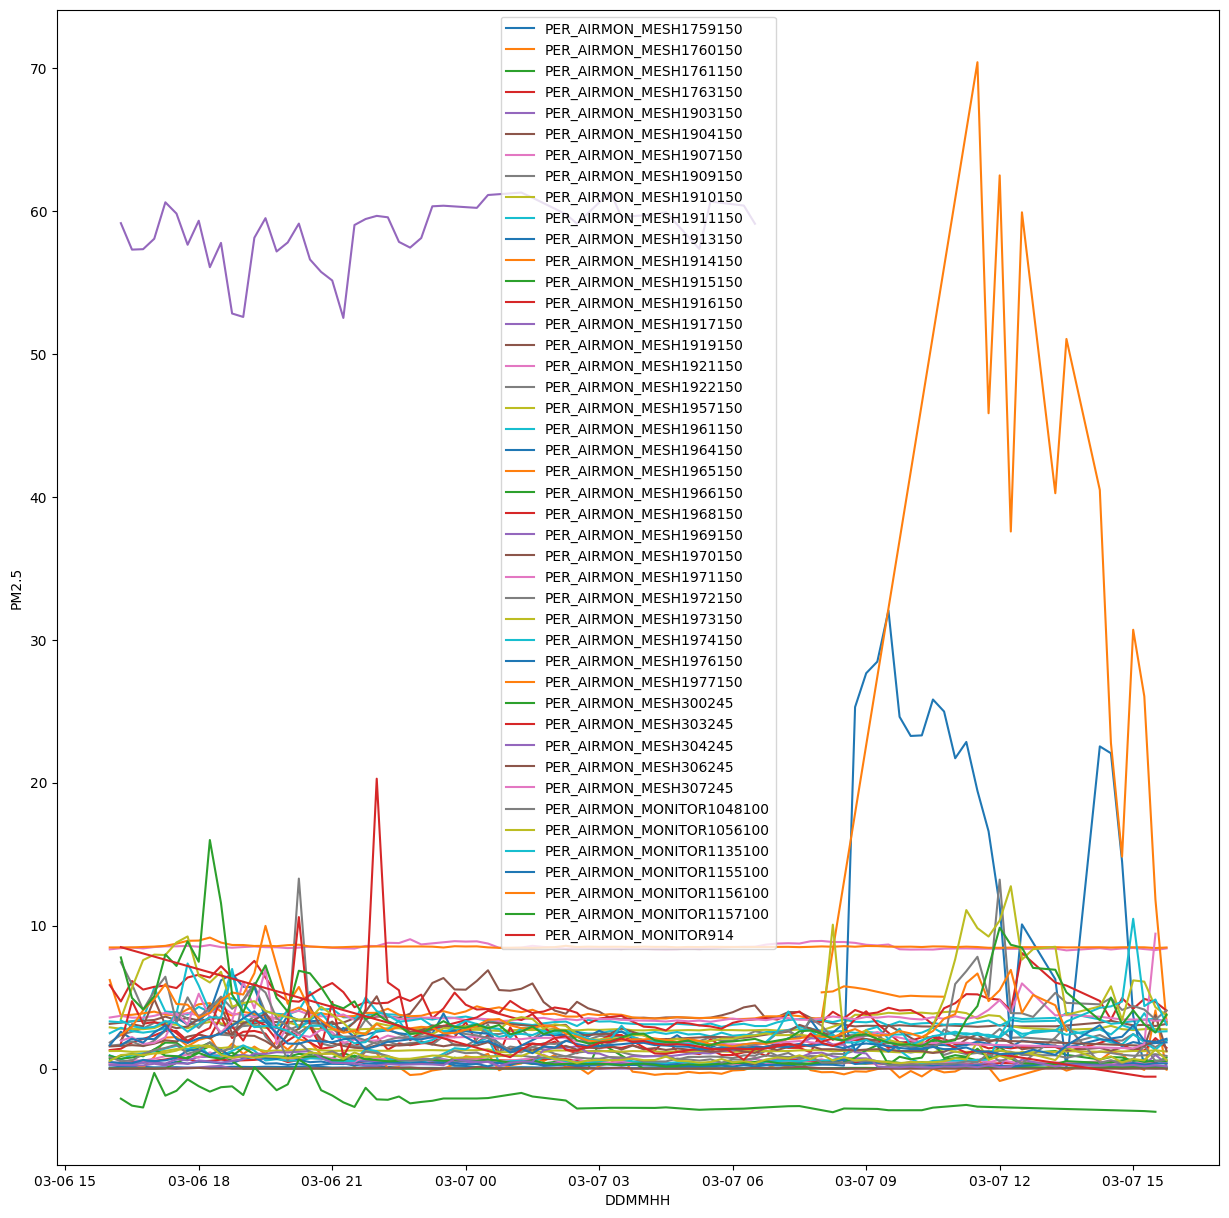

In [154]:

dfLow = df[df['Value'] < 80]
fig, ax = plt.subplots(figsize=(15,15))

for sensor_name,sensor_data in  dfLow.groupby('Sensor Name'):
    datetimes = pd.to_datetime(sensor_data['Timestamp'])
    plt.plot(datetimes,sensor_data['Value'],label=sensor_name)
    plt.xlabel("DDMMHH")
    plt.ylabel(data_params["data_variable"])
    
    
plt.legend()


In [ ]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v5.min'
    }
});

In [ ]:
%%javascript
(function(element) {
    require(['d3'], function(d3) {   
        var data = [1, 2, 4, 8, 16, 8, 4, 2, 1]

        var svg = d3.select(element.get(0)).append('svg')
            .attr('width', 400)
            .attr('height', 200);
        svg.selectAll('circle')
            .data(data)
            .enter()
            .append('circle')
            .attr("cx", function(d, i) {return 40 * (i + 1);})
            .attr("cy", function(d, i) {return 100 + 30 * (i % 3 - 1);})
            .style("fill", "#1570a4")
            .transition().duration(2000)
            .attr("r", function(d) {return 2*d;})
        ;
    })
})(element);

In [ ]:
%%javascript
(function(element) {
 require(['d3'], function(d3) { 
     
// Copyright 2022 Observable, Inc.
// Released under the ISC license.
// https://observablehq.com/@d3/spike-map
function SpikeMap(data, {
  position = d => d, // given d in data, returns the [longitude, latitude]
  value = () => undefined, // given d in data, returns the quantitative value
  title, // given a datum d, returns the hover text
  scale = d3.scaleLinear, // type of length scale
  domain, // [0, max] values; input of length scale; must start at zero
  maxLength = 200, // maximum length of spikes
  width = 640, // outer width, in pixels
  height, // outer height, in pixels
  projection, // a D3 projection; null for pre-projected geometry
  features, // a GeoJSON feature collection for the background
  borders, // a GeoJSON object for stroking borders
  spike = (length, width = 7) => `M${-width / 2},0L0,${-length}L${width / 2},0`,
  outline = projection && projection.rotate ? {type: "Sphere"} : null, // a GeoJSON object for the background
  backgroundFill = "#e0e0e0", // fill color for background
  backgroundStroke = "white", // stroke color for borders
  backgroundStrokeWidth, // stroke width for borders
  backgroundStrokeOpacity, // stroke width for borders
  backgroundStrokeLinecap = "round", // stroke line cap for borders
  backgroundStrokeLinejoin = "round", // stroke line join for borders
  fill = "red", // fill color for spikes
  fillOpacity = 0.3, // fill opacity for spikes
  stroke = "red", // stroke color for spikes
  strokeWidth, // stroke width for spikes
  strokeOpacity, // stroke opacity for spikes
  legendX = width - 20,
  legendY = height - 20,
} = {}) {
  // Compute values.
  const I = d3.map(data, (_, i) => i);
  const V = d3.map(data, value).map(d => d == null ? NaN : +d);
  const P = d3.map(data, position);
  const T = title == null ? null : d3.map(data, title);

  // Compute default domains.
  if (domain === undefined) domain = [0, d3.max(V)];

  // Construct scales.
  const length = scale(domain, [0, maxLength]);

  // Compute the default height. If an outline object is specified, scale the projection to fit
  // the width, and then compute the corresponding height.
  if (height === undefined) {
    if (outline === undefined) {
      height = 400;
    } else {
      const [[x0, y0], [x1, y1]] = d3.geoPath(projection.fitWidth(width, outline)).bounds(outline);
      const dy = Math.ceil(y1 - y0), l = Math.min(Math.ceil(x1 - x0), dy);
      projection.scale(projection.scale() * (l - 1) / l).precision(0.2);
      height = dy;
    }
  }

  // Construct a path generator.
  const path = d3.geoPath(projection);

  const svg = d3.create("svg")
      .attr("width", width)
      .attr("height", height)
      .attr("viewBox", [0, 0, width, height])
      .attr("style", "width: 100%; height: auto; height: intrinsic;");

  if (outline != null) svg.append("path")
      .attr("fill", "white")
      .attr("stroke", "currentColor")
      .attr("d", path(outline));

  svg.append("path")
      .datum(features)
      .attr("fill", backgroundFill)
      .attr("d", path);

  if (borders != null) svg.append("path")
      .attr("pointer-events", "none")
      .attr("fill", "none")
      .attr("stroke", backgroundStroke)
      .attr("stroke-linecap", backgroundStrokeLinecap)
      .attr("stroke-linejoin", backgroundStrokeLinejoin)
      .attr("stroke-width", backgroundStrokeWidth)
      .attr("stroke-opacity", backgroundStrokeOpacity)
      .attr("d", path(borders));

  const legend = svg.append("g")
      .attr("fill", "#777")
      .attr("text-anchor", "middle")
      .attr("font-family", "sans-serif")
      .attr("font-size", 10)
    .selectAll("g")
      .data(length.ticks(4).slice(1).reverse())
    .join("g")
      .attr("transform", (d, i) => `translate(${legendX - i * 18},${legendY})`);

  legend.append("path")
      .attr("fill", "red")
      .attr("fill-opacity", 0.3)
      .attr("stroke", "red")
      .attr("d", d => spike(length(d)));

  legend.append("text")
      .attr("dy", "1.3em")
      .text(length.tickFormat(4, "s"));

  svg.append("g")
      .attr("fill", fill)
      .attr("fill-opacity", fillOpacity)
      .attr("stroke", stroke)
      .attr("stroke-width", strokeWidth)
      .attr("stroke-opacity", strokeOpacity)
    .selectAll("path")
    .data(d3.range(data.length)
        .filter(i => P[i])
        .sort((i, j) => d3.ascending(P[i][1], P[j][1]) || d3.ascending(P[i][0], P[j][0])))
    .join("path")
      .attr("transform", projection == null
          ? i => `translate(${P[i]})`
          : i => `translate(${projection(P[i])})`)
      .attr("d", i => spike(length(V[i])))
      .call(T ? path => path.append("title").text(i => T[i]) : () => {});

  return svg.node();
}
 })
});



In [ ]:
%%javascript
(function(element) {
  require(['d3'], function(d3) {
    
    
    
    chart = SpikeMap(population, {
      value: ([population]) => +population,
      position([, stateid, countyid]) {
        const county = countymap.get(stateid + countyid);
        return county && centroid(county);
      },
      title([population, stateid, countyid]) {
        const state = statemap.get(stateid);
        const county = countymap.get(stateid + countyid);
        return `${county?.properties.name}, ${state?.properties.name}\n${(+population).toLocaleString("en")}`;
      },
      features: nation,
      borders: statemesh,
      width: 975,
      height: 610
        
    })
  }(element))
});